# Spectroscopy of a Multimode Cavity <mark>without thermal loss</mark>

<u>Author</u> : Soumya Shreeram (shreeramsoumya@gmail.com)<br>
<u>Date</u>$\ \ \ \$: July 2019<br>

This script was coded as part of the Helen Edwards Summer Internship program at Fermilab.

## 1. Introduction

A multi-mode QED architecture is shown in the schematic diagram below [[McKay et al.]](http://schusterlab.uchicago.edu/static/pdfs/McKay2015.pdf). The hamiltonian for such a system with two qubits with frequencies $v_{Q,1}$, $v_{Q,2}$, and $n$ mode filter can be described as the sum of the qubit Hamiltonian, $\hat{H}_Q$, the filter Hamiltonian, $\hat{H}_F$, and the qubit-filter coupling Hamiltonian, $\hat{H}_{Q-F},$
$$ \hat{H} = \hat{H_Q} + \hat{H_F} + \hat{H}_{Q-F} $$

$$ \hat{H_Q} = h\ v_{Q,1}\ \frac{\hat{ \sigma}^z_1}{2} + h\ v_{Q,2}\ \frac{\hat{ \sigma}^z_2}{2}$$

$$ \hat{H}_{F} = \sum_{i=1}^{n}h\ v_{F}\ \hat{a}^{\dagger}_i \hat{a}_i +  \sum_{i=2}^{n}h\ g_{F}\ (\hat{a}^{\dagger}_i \hat{a}_{i-1} + \hat{a}^{\dagger}_{i-1} \hat{a}_i)$$

$$ \hat{H}_{Q-F} = h\ g_{Q1,F}\ (\hat{a}^{\dagger}_1 \hat{\sigma}^-_1 + \hat{a}_1 \hat{\sigma}^+_1) + h\ g_{Q2,F}\ (\hat{a}^{\dagger}_n \hat{\sigma}^-_2 + \hat{a}_n \hat{\sigma}^+_2)$$

where $\hat{\sigma}^{+(-)}$ is the raising and lowering operator for the qubit, $\hat{a}_i$ creates a photon in the $i^{th}$ resonantor, $g_F$ is the filter-filter coupling, and $g_{Q,F}$ is the qubit-filter coupling.

The code calculates the eigen modes for such a system when the qubit 1 frequency is changed. 

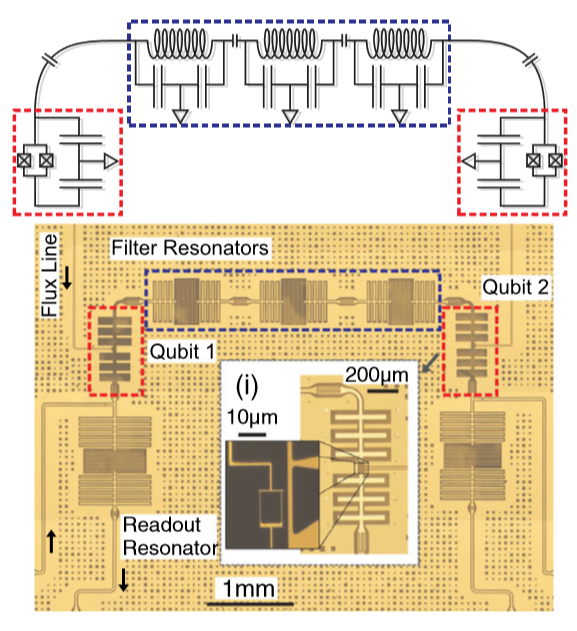

In [213]:
from IPython.display import Image
Image(filename='images/c_qubit_circuit.PNG')

In [214]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
import numpy as np
from math import pi
from qutip import *

## 2. Problem parameters
Here we use $\hbar=1$; the coupling terms are redefined with a multiple of $2\pi$ before them for convinience.

In [215]:
w_q1 = 2*pi*6.85;     # Qubit 1 frequency
w_q2 = 2*pi*6.0;    # Qubit 2 frequency: generally in the range from 1-9 GHz
w_f1 = 2*pi*7.1     # Resonator/ Filter frequency
w_f2 = 2*pi*7.24
w_f3 = 2*pi*7.37
g_f1 = 2*pi*8.18     # Filter-filter coupling
g_f2 = 2*pi*9.18 
g_q1f = 2*pi*10.45   # Qubit 1-filter coupling
g_q2f = 2*pi*13.44   # Qubit 2-filter coupling
numF = 3             # number of filters
N = 2                # number of fock states (??)

tlist = np.linspace(0, 25, 101)

## 3. Setting up the operators, the Hamiltonian and initial state

For every qubit: <br> <br>
**sm** $\ \rightarrow \ \hat{\sigma}^{+(-)}$ is the raising and lowering operator of the *qubit* <br>
**sz** $\ \ \rightarrow \ \sigma_z $ is the Pauli-z matrix of the *qubit* <br>
**n** $\ \ \ \rightarrow \ n$ is the number operator


### 3.1. Defining functions

In [216]:
def Hqubit(sz, w_q):
  """ 
  Comuptes the qubit hamiltonian
  @param sz :: Pauli's z matrix
  @param w_q :: qubit frequency
  """
  return 0.5*sz*w_q

def numOp(m):
  """
  Computes the number operator 
  @param loweringMat :: lowering matrix operator for a system
  """
  return m.dag()*m

  """
  Computes product of a2.dag()*a1, then sums this to (a2.dag()*a1).dag()
  @param a1 :: destruction operator 1
  @param a2 :: destruction operator 2
  """


### 3.2 Defining the operators for the cavties and qubits

In [217]:
# cavity 1, 2, 3 destruction operators
a1 = tensor(destroy(N), qeye(N), qeye(N), qeye(2), qeye(2))
a2 = tensor(qeye(N), destroy(N), qeye(N), qeye(2), qeye(2))
a3 = tensor(qeye(N), destroy(N), qeye(N), qeye(2), qeye(2))

# operators for qubit 1 
sm1 = tensor(qeye(N), qeye(N), qeye(N), destroy(2), qeye(2))
sz1 = tensor(qeye(N), qeye(N), qeye(N), sigmaz(), qeye(2))    
n1 = sm1.dag() * sm1

# operators for qubit 2
sm2 = tensor(qeye(N), qeye(N), qeye(N), qeye(2), destroy(2))
sz2 = tensor(qeye(N), qeye(N), qeye(N), qeye(2), sigmaz())
n2 = sm2.dag() * sm2

### 3.3 Defining the Hamiltonians for the qubit-cavity system

In [218]:
# Qubit Hamiltonians (Hq1+Hq2)
Hq1 = Hqubit(sz1, w_q1)       
Hq2 = Hqubit(sz2, w_q2)

# Filter Hamiltonians (refer formula in the Introduction)
H_f1 = tensor(destroy(N),create(N),qeye(N),qeye(2), qeye(2)) + tensor(create(N),destroy(N),qeye(N),qeye(2), qeye(2))
H_f2 = tensor(qeye(N),create(N),destroy(N),qeye(2), qeye(2)) + tensor(qeye(N),destroy(N),create(N),qeye(2), qeye(2))

Hf = w_f1*(numOp(a1) + numOp(a2) + numOp(a3))+ g_f1*H_f1+g_f2*H_f2   

# Qubit-Filter Hamiltonian
H_qf1 = tensor(create(N),qeye(N), qeye(N), sigmam(),qeye(2))
H_qf2 = tensor(destroy(N),qeye(N), qeye(N), sigmap(),qeye(2))
H_qf3 = tensor(qeye(N),qeye(N), create(N), qeye(2), sigmam())
H_qf4 = tensor(qeye(N),qeye(N), destroy(N), qeye(2), sigmap())

Hqf = g_q1f*(H_qf1+H_qf2) + g_q2f*(H_qf3+H_qf4)
 
H = Hq1 + Hq2 + Hf + Hqf   # Resultant Hamiltonian
H_q1 = Hq2 + Hf + Hqf      # Qubit 1 independent Hamiltonian

# initial state of the 2 qubit system
psi0 = tensor(basis(N, 0), basis(2, 0), basis(2, 0))

## 4. Energy spectrum of the coupled system

In [219]:
def compute(w_qList, H_q1, N, sz1):
  """
  Computes the Eigen-vales and states for a given qubit frequency
  @param w_qList :: range of qubit frequencies
  @param H_q1 :: Qubit 1 independent Hamiltonian 
  @param N :: Number of Fock states
  @param sz1 :: z matrix for qubit 1
  """
  evals_mat = np.zeros((len(w_qList), 32))
  for i, w_qi in enumerate(w_qList):
    H = Hf + Hq2 + Hqubit(sz1, w_qi)
    evals, evecs = H.eigenstates()
    evals_mat[i,:] = evals
  return evals_mat
  

In [232]:
# range of qubit 1 frequencies
w_q1List = np.linspace(1,7.2,100)*2*pi

evals_mat = compute(w_q1List, H_q1, N, sz1)

y1 = evals_mat[:, 1] - evals_mat[:, 0]

Text(0.5, 1.0, 'Energy Spectrum')

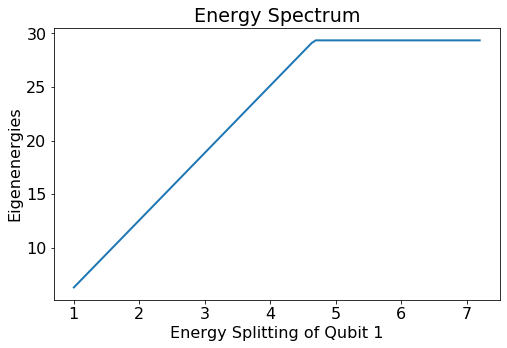

In [233]:
fig,ax = plt.subplots(figsize=(8,5))
ax.plot((w_q1List / (2 * pi)),  (evals_mat[:, 1] - evals_mat[:, 0]), lw = 2)
ax.set_xlabel('Energy Splitting of Qubit 1')
ax.set_ylabel('Eigenenergies')
ax.set_title('Energy Spectrum')

Text(0.5, 1.0, 'Energy Spectrum for 3 cavities')

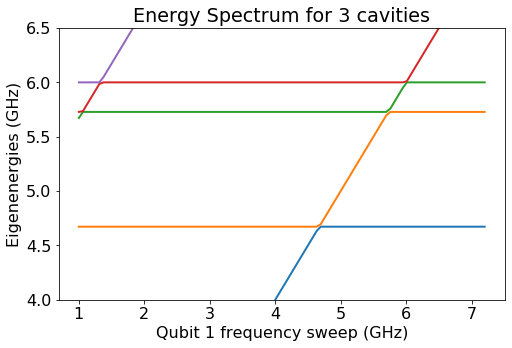

In [238]:
fig,ax = plt.subplots(figsize=(8,5))

for n in range(1,32):
  ax.plot(w_q1List / (2 * pi), (evals_mat[:, n] - evals_mat[:, 0])/ (2 * pi), lw=2)
ax.set_xlabel('Qubit 1 frequency sweep (GHz)')
ax.set_ylim([4,6.5])
ax.set_ylabel('Eigenenergies (GHz)')
ax.set_title('Energy Spectrum for 3 cavities')

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0lax">Parameters </th>
    <th class="tg-0lax">Values (GHz)</th>
  </tr>
  <tr>
    <td class="tg-0lax"> $$v_{q1}$$ </td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0lax">$v_{q2}$</td>
    <td class="tg-0lax">6.0</td>
  </tr>
  <tr>
    <td class="tg-0lax">$v_{F1}$</td>
    <td class="tg-0lax">7.1</td>
  </tr>
  <tr>
    <td class="tg-0lax">$v_{F2}$</td>
    <td class="tg-0lax">7.2</td>
  </tr>
  <tr>
    <td class="tg-0lax">$v_{F3}$</td>
    <td class="tg-0lax">7.3</td>
  </tr>
  <tr>
    <td class="tg-0lax">$g_{F}$</td>
    <td class="tg-0lax">0.118</td>
  </tr>
</table>

### Versions

In [223]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.3.1
Numpy,1.16.4
SciPy,1.2.1
matplotlib,3.1.0
Cython,0.29.10
Number of CPUs,4
BLAS Info,OPENBLAS
IPython,7.5.0
Python,"3.7.3 (v3.7.3:ef4ec6ed12, Mar 25 2019, 21:26:53) [MSC v.1916 32 bit (Intel)]"
OS,nt [win32]
